# Loan Prediction

## 0. Import Packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Prepare Data and Make Some Explorations

In [2]:
loan_train = pd.read_csv("train_ctrUa4K.csv")
print("Print the first 5 records in the dataset:")
print(loan_train.head())
print()
print("Basic descriptive statistics of all the variables:")
print(loan_train.describe())
print()
print("Present the feature attributes:")
print(loan_train.info())

Print the first 5 records in the dataset:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0       

In [3]:
# count the null columns
null_columns = loan_train.columns[loan_train.isnull().any()]
loan_train[null_columns].isnull().sum()

Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64

We find that some of the features get missing value, and we need to drop of input some value of them.
We find there are seven features have this situation: Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, and Credit_History.
We make a quick guess before we check the distribution of the variables:
1. Loan_ID is not relevent.
2. Gender should not be relevent in ideal.
3. Married 'Yes' will have more chance to be approved.
4. Dependents 'With Dependents' will have more chance to get loan, too.
5. Education Higher will be better.
6. Self_Employed not sure.
7. ApplicantIncome Higher will be better.
8. CoapplicantIncome Higher will be better.
9. LoanAmount not sure.
10. Loan_Amount_Term not sure.
11. Credit_History 'With credit history' will be better.
12. Property_Area 'Urban' will be better.

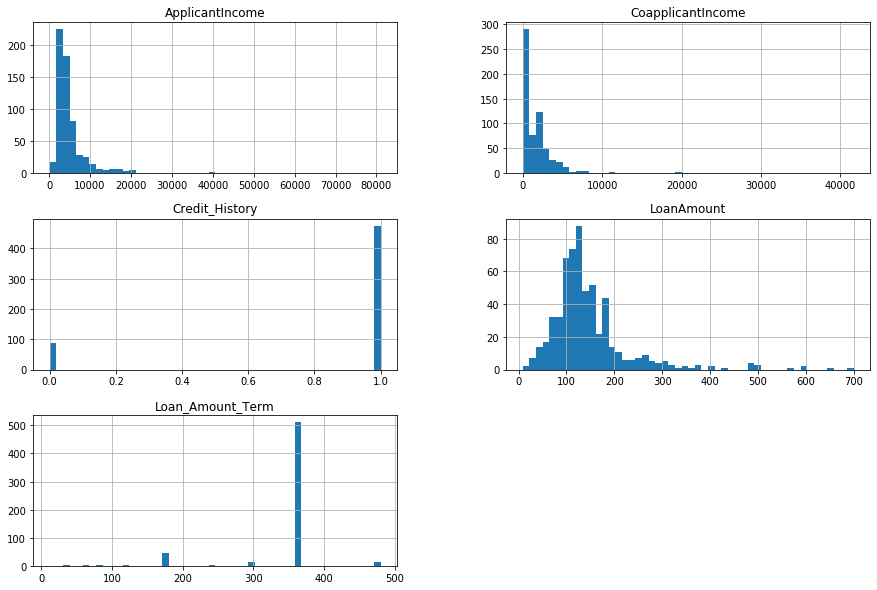

In [4]:
loan_train.hist(bins=50, figsize=(15, 10))
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


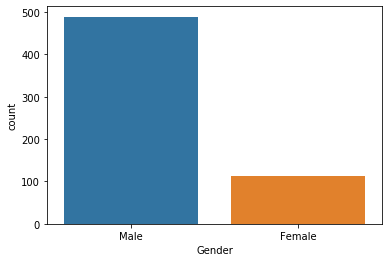

AxesSubplot(0.125,0.125;0.775x0.755)


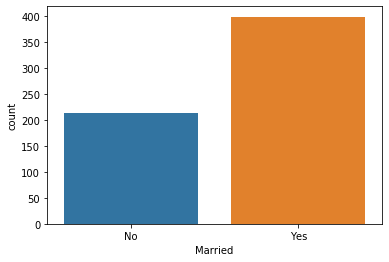

AxesSubplot(0.125,0.125;0.775x0.755)


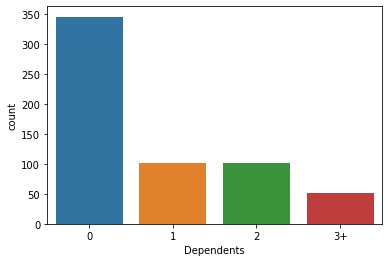

AxesSubplot(0.125,0.125;0.775x0.755)


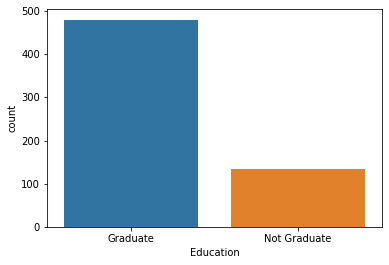

AxesSubplot(0.125,0.125;0.775x0.755)


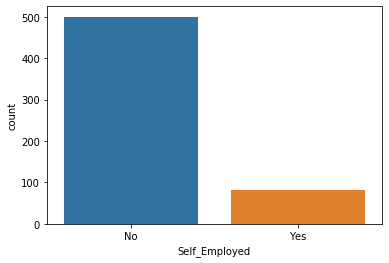

AxesSubplot(0.125,0.125;0.775x0.755)


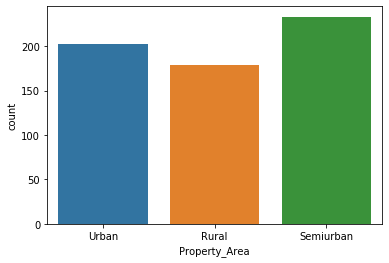

AxesSubplot(0.125,0.125;0.775x0.755)


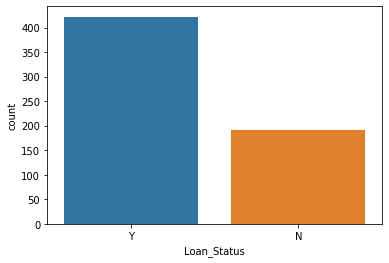

In [5]:
df_obj = loan_train.select_dtypes(include='object')

for col in df_obj.iloc[:, 1:].columns:
    print(sns.countplot(x=col, data=df_obj))
    plt.show()

Check the distribution of each variable between Loan_Status = 'Y' v.s. 'N'.

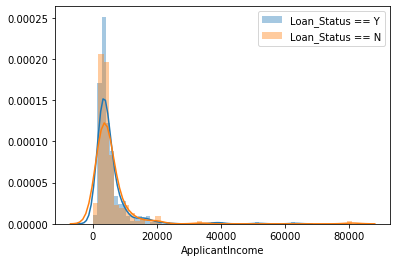

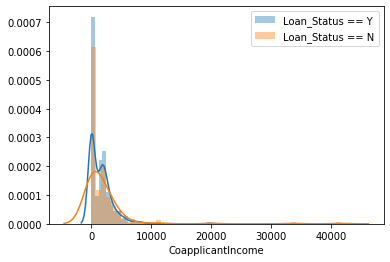

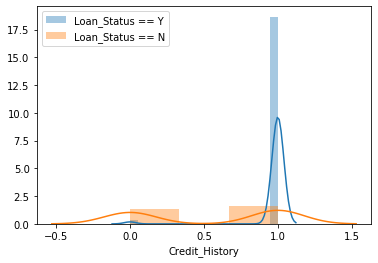

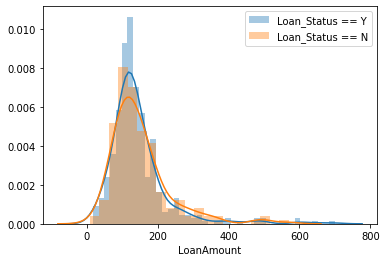

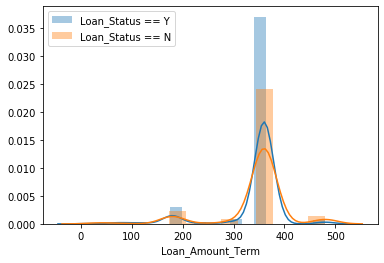

In [6]:
df_approved = loan_train[loan_train['Loan_Status'] == 'Y']
df_rejected = loan_train[loan_train['Loan_Status'] == 'N']

non_object_variables = ['ApplicantIncome', 'CoapplicantIncome', 
                        'Credit_History', 'LoanAmount', 'Loan_Amount_Term']

for obj in non_object_variables:
    sns.distplot(df_approved[obj][df_approved[obj].isnull() == False], label = 'Loan_Status == Y')
    sns.distplot(df_rejected[obj][df_rejected[obj].isnull() == False], label = 'Loan_Status == N')
    plt.legend()
    plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


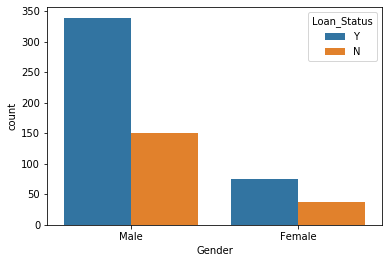

AxesSubplot(0.125,0.125;0.775x0.755)


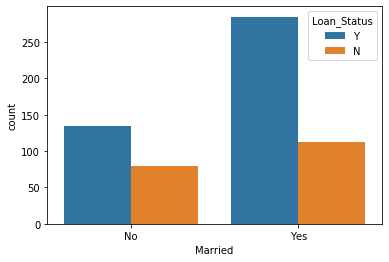

AxesSubplot(0.125,0.125;0.775x0.755)


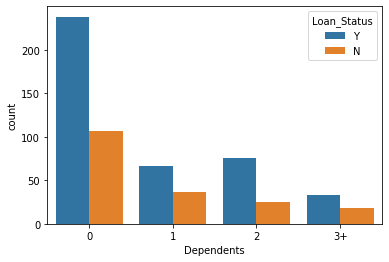

AxesSubplot(0.125,0.125;0.775x0.755)


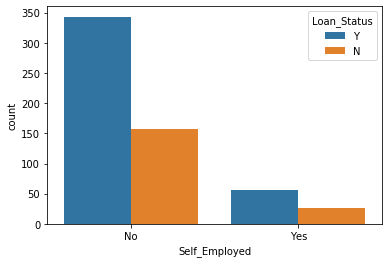

AxesSubplot(0.125,0.125;0.775x0.755)


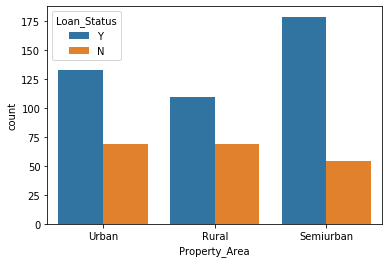

In [7]:
object_variables = ['Gender', 'Married', 'Dependents', 
                   'Self_Employed', 'Property_Area']

for obj in object_variables:
    print(sns.countplot(x=obj, data=df_obj, hue='Loan_Status'))
    plt.show()

We conclude that the higher Y/N ratio, the higher possibility to get loan approved.

## 2. Feature Engineering

### 2.1 Fill the Missing Value with mode() (the value appear the most often)

In [8]:
def fill_with_mode(df, x):
    df[x].fillna(df[x].mode()[0], inplace=True)
    
has_null_objects = ['Gender', 'Married', 'Dependents',
                    'Self_Employed', 'LoanAmount', 'Loan_Amount_Term',
                    'Credit_History']

for obj in has_null_objects:
    fill_with_mode(loan_train, obj)

In [9]:
# make sure all null value has bee filled
for col in loan_train.columns:
    print('Variable', col, 'has missing entry:', sum(loan_train[col].isnull()))

Variable Loan_ID has missing entry: 0
Variable Gender has missing entry: 0
Variable Married has missing entry: 0
Variable Dependents has missing entry: 0
Variable Education has missing entry: 0
Variable Self_Employed has missing entry: 0
Variable ApplicantIncome has missing entry: 0
Variable CoapplicantIncome has missing entry: 0
Variable LoanAmount has missing entry: 0
Variable Loan_Amount_Term has missing entry: 0
Variable Credit_History has missing entry: 0
Variable Property_Area has missing entry: 0
Variable Loan_Status has missing entry: 0


In [10]:
X = loan_train.iloc[:, 1:-1]
y = loan_train.iloc[:, -1]

In [11]:
print(X.shape)
print(y.shape)

(614, 11)
(614,)


### 2.2 One Hot Encoding to Categorical Features

In [12]:
# these four columns need to be onehotted
onehot_targets = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 
                  'Property_Area']

In [13]:
for target in onehot_targets:
    onehot_temp = pd.get_dummies(X[target])
    X = X.drop(target, axis=1)
    X = pd.concat([onehot_temp, X], axis=1)

### 2.3 Label Encoding to Predicted Value

In [14]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)

LabelEncoder()

In [15]:
y = le.transform(y)

In [16]:
# prepare train and validation data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## 3. Prepare Model

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [18]:
clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
print("Random forest Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Random forest Accuracy: 0.75 (+/- 0.04)


## 4. Hyperparameter Searching with RandomSearchCV

In [19]:
from sklearn.model_selection import RandomizedSearchCV

# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=10, stop=700, num=10)]
# number of features to consider in every split
max_features = ['auto', 'sqrt']
# maximum level in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
# minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# method of selecting samples of training each tree
bootstrap = [True, False]

# create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 86, 163, 240, 316, 393, 470, 546, 623, 700], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [20]:
# start hyperparameter searching
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100,
                              cv=5, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X, y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.8min finished
/home/ccc/anaconda3/envs/mlnote/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [21]:
# print the best hyperparameters
rf_random.best_params_

{'n_estimators': 546,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

## 5. Train and Evaulate Model

In [22]:
clrf_grid = RandomForestClassifier(n_estimators=546, min_samples_split=2, min_samples_leaf=4,
                                  max_features='sqrt', max_depth=10, bootstrap=True)
scores = cross_val_score(clrf_grid, X, y, cv=5)

In [23]:
print("Grid Random Forst Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Grid Random Forst Accuracy: 0.81 (+/- 0.06)


## 6. Work on Test Data

In [24]:
loan_test = pd.read_csv('test_lAUu6dG.csv')
    
X_test = loan_test.iloc[:, 1:]
    
for feature in has_null_objects:
    fill_with_mode(X_test, feature)
    
# make sure all null value has bee filled
for col in X_test.columns:
    print('Variable', col, 'has missing entry:', sum(X_test[col].isnull()))

Variable Gender has missing entry: 0
Variable Married has missing entry: 0
Variable Dependents has missing entry: 0
Variable Education has missing entry: 0
Variable Self_Employed has missing entry: 0
Variable ApplicantIncome has missing entry: 0
Variable CoapplicantIncome has missing entry: 0
Variable LoanAmount has missing entry: 0
Variable Loan_Amount_Term has missing entry: 0
Variable Credit_History has missing entry: 0
Variable Property_Area has missing entry: 0


In [25]:
# onehot encoding to test data specific features
for target in onehot_targets:
    onehot_temp = pd.get_dummies(X_test[target])
    X_test = X_test.drop(target, axis=1)
    X_test = pd.concat([onehot_temp, X_test], axis=1)

In [26]:
clrf_grid.fit(X, y)

results = clrf_grid.predict(X_test)
SJ_submit = pd.DataFrame({"Loan_ID": loan_test['Loan_ID'], "Loan_Status": results})
print(SJ_submit.head())

    Loan_ID  Loan_Status
0  LP001015            1
1  LP001022            1
2  LP001031            1
3  LP001035            1
4  LP001051            1


In [28]:
pd.DataFrame(SJ_submit).to_csv("submit_CudaChen.csv", index=False)